# Predicting the sale price of Bulldozers using machine learning

In this notebook, we will go through a machine learning project with the aim of predicting the sale price of a bulldozer given certain features and attributes.

## 1. Problem Definition

> How well can the future price of a bulldozer be predicted given certain characteristics and examples of previously sold bulldozers.

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers Competition:
https://www.kaggle.com/c/bluebook-for-bulldozers/data

The 3 main datasets includes:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set    throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this machine learning model is the RMSLE (Root mean squared log error) between the actual and predicted auction prices.

The goal for any regression model is to minimise the error. For example the goal for this project is to build a machine learning model which minimises the error, i.e. Mean Absolute Error.

## 4. Features

Kaggle has a data dictionary for this project that can be viewed on google sheets:
https://drive.google.com/file/d/1VJFSRKiRkbKCitGHy4X5QP2PAc7zxFDI/view?usp=sharing

Here is the condensed data dictionary should the above link not work:
1. SalesID = Unique identifier of a sale
2. MachineID = Identifier for a type of machine, duplicates can exist
3. ModelID = Identifier for a unique machine model
4. datasource = Source of the sale record
5. auctioneerID = Identifier of a particular firm that sold the machine at auction, different to data source
6. YearMade = Year of manufacturing of the machine
7. MachineHoursCurrentMeter = Current usage of machine per hour at time of sale. Null or 0 means no hours reported
8. UsageBand = (low,medium,high) calculated comparing Machine-Sale hours to average usage for the fiBaseModel
9. Saledate = Time of sale
10. Saleprice = Cost of sale in USD
11. fiModelDesc = unique machine model -> concatenation of fiBaseModel+fiSecondaryDesc+fiModelSeries+fiModelDescriptor
12. fiBaseModel = Disaggregation of fiModelDesc
13. fiSecondaryDesc = Disaggregation of fiModelDesc
14. fiModelSeries = Disaggregation of fiModelDesc
15. fiModelDescriptor = Disaggregation of fiModelDesc
16. ProductSize = Size class grouping for a product group.
17. ProductClassDesc = Description of 2nd level hierarchical grouping of fiModelDesc
18. State = US State in which sale occured
19. ProductGroup = Identifier for top level hierarchical grouping of fiModelDesc
20. ProductGroupDesc = Descriptor for top level hierarchical grouping of fiModelDesc
21. Drive_System = Machine config; 2 or 4 wheel drive
22. Enclosure = Does machine have enclosed cab or not
23. Forks = Attachment used for lifting
24. Pad_Type = Type of treads the machine uses
25. Ride_Control = Optional feature on loaders to make ride smoother
26. Stick = Type of control
27. Transmission = Auto or manual
28. Turbocharged = Engine naturally aspirated or turbocharged
29. Blade_Extension = Extension of standard blade
30. Blade_Width = Width of blade
31. Enclosure_Type = Enclosed cab or not
32. Engine_Horsepower = HP rating
33. Hydraulics = Type of hydraulics
34. Pushblock = Option
35. Ripper = Implement attached to machine to till soil
36. Scarifier = Implement attached to machine to condition soil
37. Tip_control = Type of blade control
38. Tire_size = size of primary tires
39. Coupler = Type of implement interface
40. Coupler_system = type of implement interface
41. Grouser_Tracks = Describes ground contact interface
42. Hydraulics_Flow = normal or high flow
43. Track_Type = Type of treads a crawler machine uses
44. Undercarriage_pad_width = width of crawler treads
45. stick_length = length of machine digging implement
46. thumb = attachment used for grabbing
47. pattern_changer = adjust the operator control config to suit user
48. grouser_type=  type of treads a crawler machine uses
49. backhoe_mounting = interface used to add a backhoe attachment
50. blade_type = describes type of blade
51. travel_controls = operator control config
52. Differential_type = locking or standard
53. Steering_controls = operator control config

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
#Import training and validation sets
df = pd.read_csv("bluebook-for-bulldozers/TrainandValid.csv")

C:\Users\Hemil\Desktop\Project_Bulldozer\env\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()#Have a look at the data

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()#Find columns with NaN values

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
#Convert sale date column to sale object
#Must reimport data 
df = pd.read_csv("bluebook-for-bulldozers/TrainandValid.csv",parse_dates=["saledate"])

C:\Users\Hemil\Desktop\Project_Bulldozer\env\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df["saledate"].dtype

dtype('<M8[ns]')

In [8]:
df["saledate"].head()#Data is converted to the datetime type

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

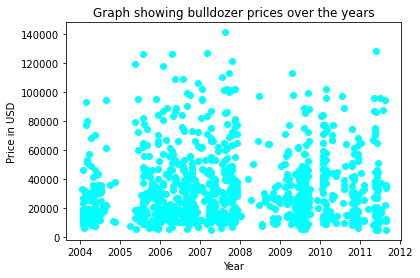

In [9]:
plt.scatter(df.saledate[:1000],df.SalePrice[:1000],color="cyan");#Get an overview of prices over the period
plt.xlabel("Year")
plt.ylabel("Price in USD")
plt.title("Graph showing bulldozer prices over the years");

In [10]:
#Lets now sort the dataframe by saledate
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [11]:
#Create a temporary copy for use
df_backup = df.copy()

In [12]:
#Enrich data with date and time features
df_backup["year"] = df.saledate.dt.year
df_backup["month"] = df.saledate.dt.month
df_backup["day"] = df.saledate.dt.day
df_backup["weekday"] = df.saledate.dt.dayofweek
df_backup["dayofyear"] = df.saledate.dt.dayofyear

In [13]:
df_backup.head()#Check if data is updated

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day,weekday,dayofyear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [14]:
#Remove the sale date column
df_backup.drop("saledate",axis=1,inplace=True)

In [15]:
df_backup.head()#Check for removal

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day,weekday,dayofyear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [16]:
df_backup.state.value_counts()#Checking spread of data

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

Time to perform a model driven EDA

In [17]:
#Time to build a ML model
from sklearn.ensemble import RandomForestRegressor

#Place data into X and Y
X = df_backup.drop("SalePrice",axis=1)
Y = df_backup["SalePrice"]

#Create a model
model = RandomForestRegressor()
model.fit(X,Y)

ValueError: could not convert string to float: 'Low'

### Convert string to categories

Data can be turned into panda categories

The different compatible datatypes can be found here:
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html

In [18]:
#Find the columns that have strings
for label, cols in df_backup.items():
    if pd.api.types.is_string_dtype(cols):
        print(label,"is a string")

UsageBand is a string
fiModelDesc is a string
fiBaseModel is a string
fiSecondaryDesc is a string
fiModelSeries is a string
fiModelDescriptor is a string
ProductSize is a string
fiProductClassDesc is a string
state is a string
ProductGroup is a string
ProductGroupDesc is a string
Drive_System is a string
Enclosure is a string
Forks is a string
Pad_Type is a string
Ride_Control is a string
Stick is a string
Transmission is a string
Turbocharged is a string
Blade_Extension is a string
Blade_Width is a string
Enclosure_Type is a string
Engine_Horsepower is a string
Hydraulics is a string
Pushblock is a string
Ripper is a string
Scarifier is a string
Tip_Control is a string
Tire_Size is a string
Coupler is a string
Coupler_System is a string
Grouser_Tracks is a string
Hydraulics_Flow is a string
Track_Type is a string
Undercarriage_Pad_Width is a string
Stick_Length is a string
Thumb is a string
Pattern_Changer is a string
Grouser_Type is a string
Backhoe_Mounting is a string
Blade_Type is

In [19]:
#Turn strings into categories
for label, cols in df_backup.items():
    if pd.api.types.is_string_dtype(cols):
        df_backup[label] = cols.astype("category").cat.as_ordered()

In [20]:
df_backup.info()#check if converted succesfully

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [21]:
df_backup.Thumb.cat.categories#Auto places them in categories
#0 represents hydraulic
#1 represents manual
#2 represents none or unspecified

Index(['Hydraulic', 'Manual', 'None or Unspecified'], dtype='object')

In [22]:
#Make custom code for the above if your bothered:



In [23]:
df_backup.isnull().sum()#Check for missing data again to be filled

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Fill missing values

#### Check the numeric data

In [24]:
#Tells us which cols have null values
for label, cols in df_backup.items():
    if pd.api.types.is_numeric_dtype(cols) and pd.isnull(cols).sum():
        print(label)
        

auctioneerID
MachineHoursCurrentMeter


In [25]:
for label, cols in df_backup.items():
    if pd.api.types.is_numeric_dtype(cols) and pd.isnull(cols).sum():
        #Column to say its missing
        df_backup[label+"_is_missing"] = pd.isnull(cols)
        #Fill missing numeric values with the median
        df_backup[label] = cols.fillna(cols.median())

In [26]:
df_backup.isna().sum()#check if numeric type fixed

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [27]:
#Fill the categorical data
for label, cols in df_backup.items():
    if not pd.api.types.is_numeric_dtype(cols):
        #Add column to say its missing
        df_backup[label+"_is_missing"] = pd.isnull(cols)
        #Turn categories into numbers
        df_backup[label] = pd.Categorical(cols).codes + 1

In [28]:
df_backup.isna().sum()#recheck data

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [29]:
df_backup.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


## 5. Modelling

Now that the data is numeric as well as no missing values, a machine learning model can be made

In [30]:
#Instantiate models
model = RandomForestRegressor()

#Fit model
X = df_backup.drop("SalePrice",axis=1)
Y = df_backup["SalePrice"]
model.fit(X,Y)

RandomForestRegressor()

In [31]:
#Score the model
model.score(X,Y)

0.987565421724781

In [32]:
#Split data into training and validation
df_val = df_backup[df_backup.year == 2012]
df_train = df_backup[df_backup.year != 2012]

In [35]:
#Split data into X and y
X_train, Y_train = df_train.drop("SalePrice",axis=1), df_train.SalePrice
X_valid, Y_valid = df_val.drop("SalePrice",axis=1), df_val.SalePrice

### Evaluation Function

In [36]:
# Root Mean Squared Log Error
from sklearn.metrics import mean_squared_log_error, r2_score

def eval_score(y_test,y_preds):
    """
    Calculate root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create function to evaluate different levels

def scores(model):
    train_pred = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Train RMSLE":eval_score(Y_train,train_pred),
             "Valid RMSLE":eval_score(Y_valid,val_preds),
             "Training R^2":r2_score(Y_train,train_pred),
             "Valid R^2":r2_score(Y_valid,val_preds)}
    return scores

### Test model on subset of data to tune hyperparameters as there is too much data

In [38]:
model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)#Use first 10k samples only
model.fit(X_train,Y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [39]:
scores(model)

{'Train RMSLE': 0.2577477569876176,
 'Valid RMSLE': 0.293595185306081,
 'Training R^2': 0.8607116981822567,
 'Valid R^2': 0.8316902392066935}

No overfitting as training data is better than validation data. These metrics are naturally worse as we are using a small proportion of the dataset.

### Time to tune hyperparameters using RandomizedSearchCV

In [40]:
from sklearn.model_selection import RandomizedSearchCV

#Different hyperparameters
rf_grid = {"n_estimators":[10,20,30,40,50,60,70,80,90,100],
          "max_depth":[None,3,5,10],
          "min_samples_split":[2,4,6,8,10],
          "min_samples_leaf":[2,4,6,8,10],
          "max_features":[0.5,1,"auto"],
          "max_samples":[10000]}

#Instantiate model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,n_iter=10,cv=5,
                             verbose=True)

#Fit randomizedseachCV model
rs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.7min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   verbose=True)

In [42]:
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [44]:
scores(rs_model)

{'Train RMSLE': 0.2694580611924175,
 'Valid RMSLE': 0.3029419562475989,
 'Training R^2': 0.8451145142305703,
 'Valid R^2': 0.8277852708771394}

In [45]:
scores(model)

{'Train RMSLE': 0.2577477569876176,
 'Valid RMSLE': 0.293595185306081,
 'Training R^2': 0.8607116981822567,
 'Valid R^2': 0.8316902392066935}

One thing to take note of here is that the score becomes worth with the new hyperparameters, the best way to improve the model would be to increase the number of iterations performed by the SearchCV. Also, the score in general tends to be bad because this does not make use of the entire dataset, only a small proportion hence the score is worsened by this factor. Due to my lack of computational power, I have reduced the size of the sample and iterations.

In [46]:
#Below is an ideal set of hyperparameter as found by the supervisor of this course

ideal_model = RandomForestRegressor(n_estimators=40,min_samples_leaf=1,min_samples_split=14,max_features=0.5,n_jobs=-1,
                                   max_samples=None,random_state=42)

ideal_model.fit(X_train,Y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [48]:
scores(ideal_model)

{'Train RMSLE': 0.14446831828269255,
 'Valid RMSLE': 0.2455197857548867,
 'Training R^2': 0.9589267192100979,
 'Valid R^2': 0.8816029704165416}

Large improvement seen on this model as all the training data has been used

### Make predicitons on test data

In [49]:
#Import test data
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv",parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [50]:
#Now to preprocess data to numeric and remove missing data

#Enrich data with date and time features
df_test["year"] = df_test.saledate.dt.year
df_test["month"] = df_test.saledate.dt.month
df_test["day"] = df_test.saledate.dt.day
df_test["weekday"] = df_test.saledate.dt.dayofweek
df_test["dayofyear"] = df_test.saledate.dt.dayofyear


#Turn strings into categories
for label, cols in df_test.items():
    if pd.api.types.is_string_dtype(cols):
        df_test[label] = cols.astype("category").cat.as_ordered()

#Fill numeric data with median
for label, cols in df_test.items():
    if pd.api.types.is_numeric_dtype(cols) and pd.isnull(cols).sum():
        #Column to say its missing
        df_test[label+"_is_missing"] = pd.isnull(cols)
        #Fill missing numeric values with the median
        df_test[label] = cols.fillna(cols.median())
        
#Fill the categorical data
for label, cols in df_test.items():
    if not pd.api.types.is_numeric_dtype(cols):
        #Add column to say its missing
        df_test[label+"_is_missing"] = pd.isnull(cols)
        #Turn categories into numbers
        df_test[label] = pd.Categorical(cols).codes + 1
        
df_test.drop("saledate",axis=1,inplace=True)

In [52]:
df_test.isna().sum()#Check to ensure no NA values

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 102 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [56]:
test_preds = ideal_model.predict(df_test)

In [57]:
test_preds#Array of prices

array([18725.60852632, 17165.86473394, 51204.72609507, ...,
       12639.77360553, 18606.70450199, 28995.67156603])

In [60]:
#Format predictions
df_preds = pd.DataFrame()
df_preds["ID"] = df_test["SalesID"]
df_preds["Sales Price"] = test_preds

In [61]:
df_preds

,ID,Sales Price
0,1227829,18725.608526
1,1227844,17165.864734
2,1227847,51204.726095
3,1227848,68846.690164
4,1227863,58630.780749
...,...,...
12452,6643171,41214.629438
12453,6643173,11385.635369
12454,6643184,12639.773606
12455,6643186,18606.704502


In [62]:
df_preds.to_csv("bluebook-for-bulldozers/test_preds.csv",index=False)

### Feature Importance

Which attributes were the most important when it came to predicting the sale price.

<BarContainer object of 20 artists>

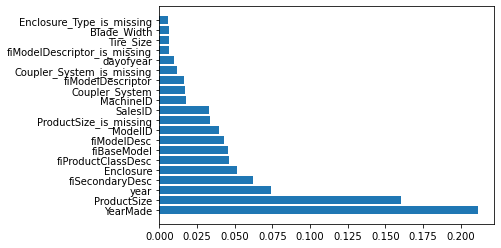

In [95]:
df_for_plot = pd.DataFrame({"features":X_train.columns,"feature importance":ideal_model.feature_importances_}).sort_values("feature importance",ascending=False).reset_index(drop=True)
plt.barh(df_for_plot["features"][:20],df_for_plot["feature importance"][:20])

## 6. Evaluation

As the above graph shows, the machine learning model has put heavy weightings on attributes of the following things:

* YearMade
* ProductSize
* Year (Sale)
* fiSecondaryDesc
* Enclosure
* fiProductClassDesc
* fiBaseModel
* fiModelDesc
* ModelID

These factors have all got more than 0.025 weighting on the machine learning model which I had set as the minimum bar to be considered as an important feature.

Overall, the machine learning model works well with the validtion and test splits. Only some hyperparameter tuning has been done in order to come up with an improved model due to the lack of computation power and time requirements of the large dataset. This project actually relates to the Kaggle competition and using the ideal model, the model places in the top 30 submissions and my model places in the top 80 submissions. 

#### How can improvements be made?

In the case of this particular project, more data will not mean better results as we already have access to a large dataset. However what may be the case it that is there another feature that may have been missed out in the dataset which may have a strong correlation to bulldozer pricing. More parameter tuning using GridSearchCV may prove to produce better results than RandomizedSearchCV due to the brute force nature. Lastly, if tuning the hyperparameters do not make a large difference after testing, what may be suitable is to try out a new model instead of RandomForestRegressor. These include:

* SVM Linear/Non Linear model
* RidgeRegression Model
* SGD Regressor
* CatBoost.ai
* XGBoost.ai

#### Project Bulldozer

14/08/2020

#### By: Hemil Shah